<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [11]:
## Write your code here
df.duplicated(subset=df.columns.difference(['ResponseId'])).sum()

np.int64(487)

##### Task 2: Remove the duplicate rows from the dataframe.



In [14]:
## Write your code here
df.drop_duplicates(subset=df.columns.difference(['ResponseId']), inplace=True)
duplicate_count = df.duplicated(subset=df.columns.difference(['ResponseId'])).sum()
print(f"Number of duplicates after removal: {duplicate_count}")

Number of duplicates after removal: 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [16]:
## Write your code here
missing_values = df.isnull().sum()
missing_values

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10546
                       ...  
JobSatPoints_11        35505
SurveyLength            8768
SurveyEase              8712
ConvertedCompYearly    41515
JobSat                 35824
Length: 114, dtype: int64

##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [18]:
## Write your code here
missing_RemoteWork = df['RemoteWork'].isnull().sum()
print(f"Number of missing rows in 'RemoteWork': {missing_RemoteWork}")

Number of missing rows in 'RemoteWork': 10546


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [19]:
## Write your code here
print(df['RemoteWork'].value_counts())

RemoteWork
Hybrid (some remote, some in-person)    22850
Remote                                  20732
In-person                               10822
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [20]:
## Write your code here
most_frequent_value = df['RemoteWork'].mode()[0]
print(f"The most frequent value in 'RemoteWork': {most_frequent_value}")

The most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [25]:
## Write your code here
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_value)

##### Task 8: Check for any compensation-related columns and describe their distribution.



Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']
Missing values in ConvertedCompYearly: 41515
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


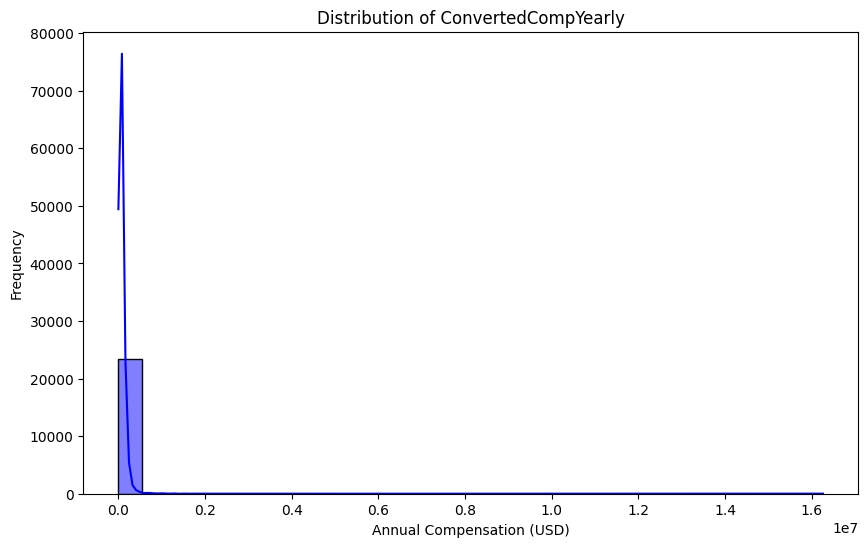

In [26]:
## Write your code here
# Step 1: Identify compensation-related columns
compensation_columns = [col for col in df.columns if 'Comp' in col]
print(f"Compensation-related columns: {compensation_columns}")

# Step 2: Check for missing values in a compensation column (e.g., ConvertedCompYearly)
missing_values = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in ConvertedCompYearly: {missing_values}")

# Step 3: Describe the distribution
# Descriptive statistics
print(df['ConvertedCompYearly'].describe())

# Visualize the distribution using a histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], kde=True, bins=30, color="blue")
plt.title("Distribution of ConvertedCompYearly")
plt.xlabel("Annual Compensation (USD)")
plt.ylabel("Frequency")
plt.show()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
